In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [143]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, index_col=0)

lower_bound = df['value'].quantile(0.025)  
upper_bound = df['value'].quantile(0.975)  
df_clean = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]


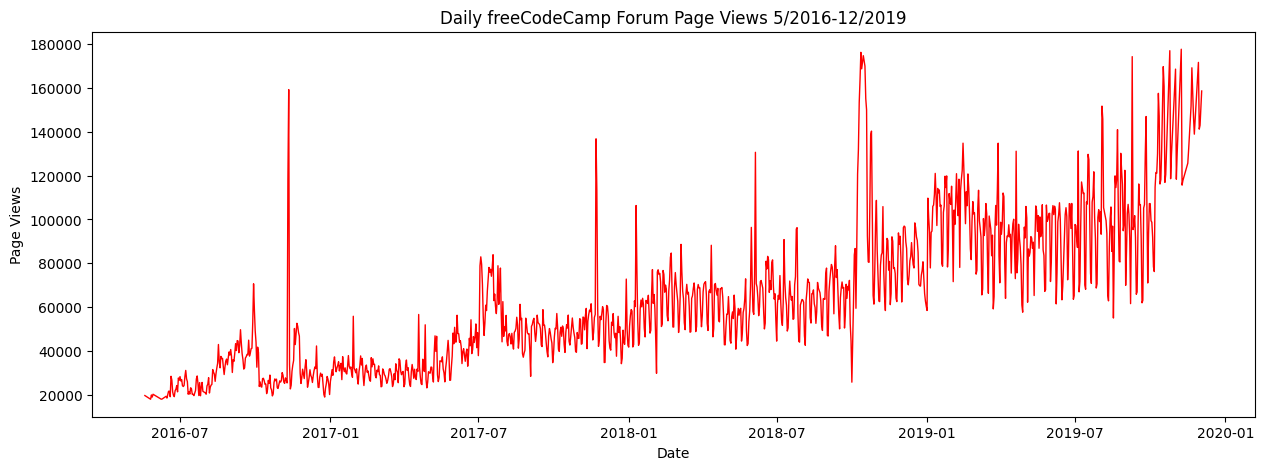

In [93]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

ax.plot(df_clean['value'], linewidth=1, color='red')



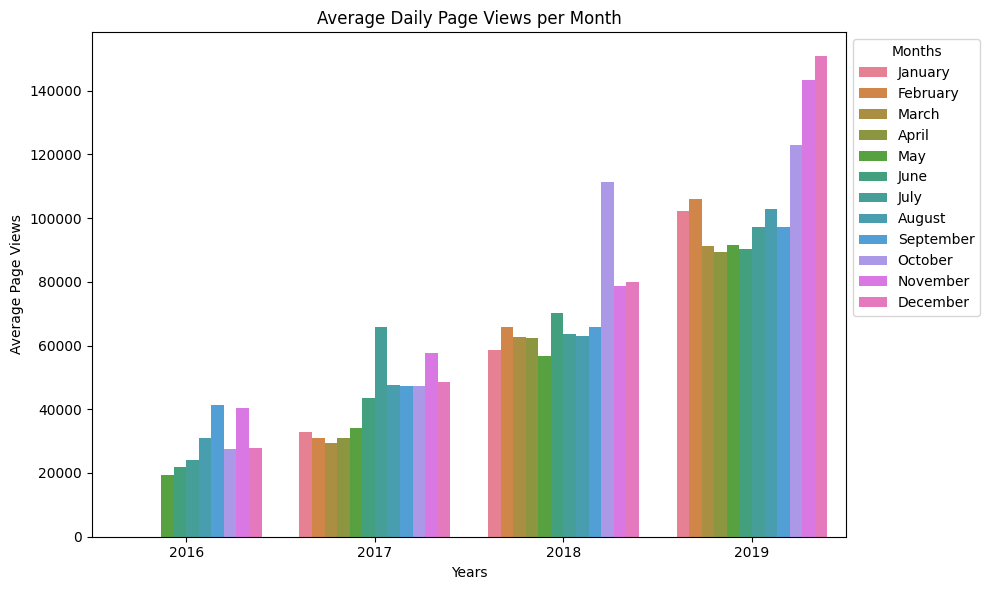

In [208]:
df_bar = df_clean.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month_name()
df_bar = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df_bar['month'] = pd.Categorical(df_bar['month'], categories=month_order, ordered=True)
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df_bar, x='year', y='value', hue='month')
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.set_title('Average Daily Page Views per Month')
plt.legend(title='Months', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()


Text(0, 0.5, 'Page Views')

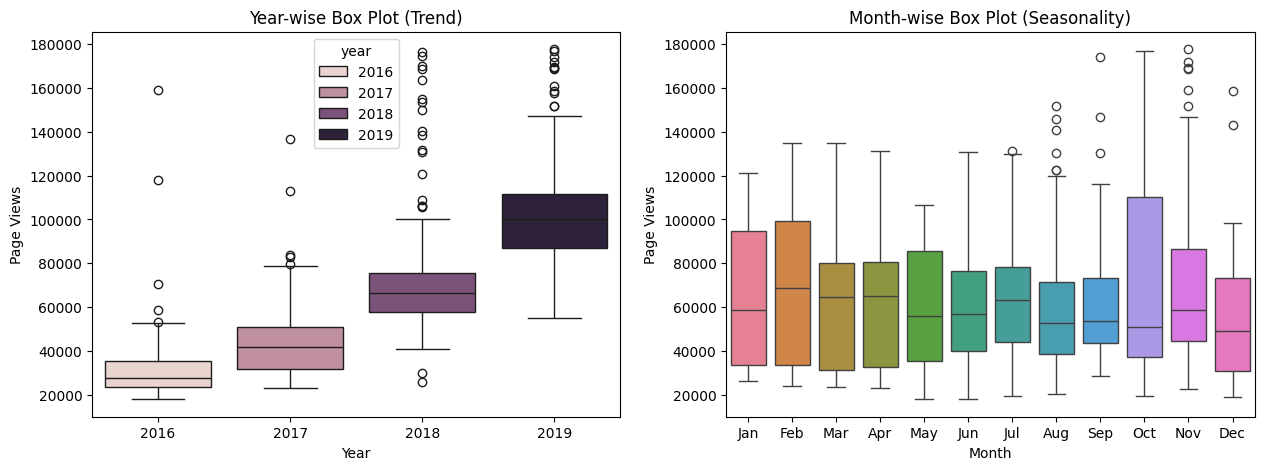

In [ ]:
df_box = df_clean.copy()
df_box['year'] = df_box.index.year
df_box['month'] = df_box.index.strftime('%b')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_box['month'] = pd.Categorical(df_box['month'], categories=month_order, ordered=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

sns.boxplot(data=df_box, x='year', y='value', ax=ax1, hue='year')
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

sns.boxplot(data=df_box, x='month', y='value', ax=ax2, hue='month')
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
